In [1]:
import pandas as pd
df=pd.read_csv(r"C:\Users\GT-499\Downloads\Newspaper.csv")

#use case:Simple Linear Regression
# use case:we are anlyzing daily edition with sunday edition 
#using newspaper data and linear regression model


In [2]:
df

,Newspaper,daily,sunday
0,Baltimore Sun,391.952,488.506
1,Boston Globe,516.981,798.298
2,Boston Herald,355.628,235.084
3,Charlotte Observer,238.555,299.451
4,Chicago Sun Times,537.780,559.093
5,Chicago Tribune,733.775,1133.249
6,Cincinnati Enquirer,198.832,348.744
7,Denver Post,252.624,417.779
8,Des Moines Register,206.204,344.522
9,Hartford Courant,231.177,323.084


In [3]:
df.shape
# 34 rows and 3 columns

(34, 3)

In [4]:
df.columns

Index(['Newspaper', 'daily', 'sunday'], dtype='object')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34 entries, 0 to 33
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Newspaper  34 non-null     object 
 1   daily      34 non-null     float64
 2   sunday     34 non-null     float64
dtypes: float64(2), object(1)
memory usage: 948.0+ bytes


In [6]:
df.isnull().sum()

Newspaper    0
daily        0
sunday       0
dtype: int64

In [7]:
z=df.corr(numeric_only=True)
z
#df.corr()

,daily,sunday
daily,1.000000,0.958154
sunday,0.958154,1.000000


<Axes: >

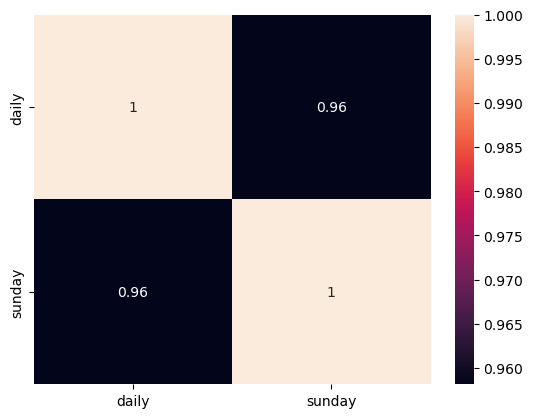

In [8]:
import seaborn as sns
sns.heatmap(z,annot=True)

C:\Users\GT-499\AppData\Local\Temp\ipykernel_8920\2574004231.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['daily'])


<Axes: xlabel='daily', ylabel='Density'>

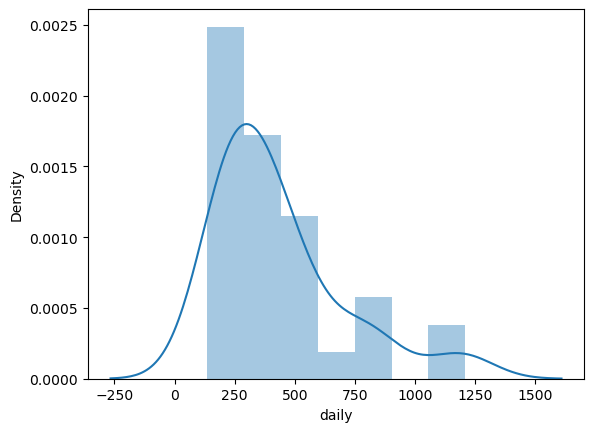

In [9]:
# distplot=DISTRIBUTION PLOT
# histogram,density plot(Normally Distributed)
sns.distplot(df['daily'])

C:\Users\GT-499\AppData\Local\Temp\ipykernel_8920\1036117173.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['sunday'])


<Axes: xlabel='sunday', ylabel='Density'>

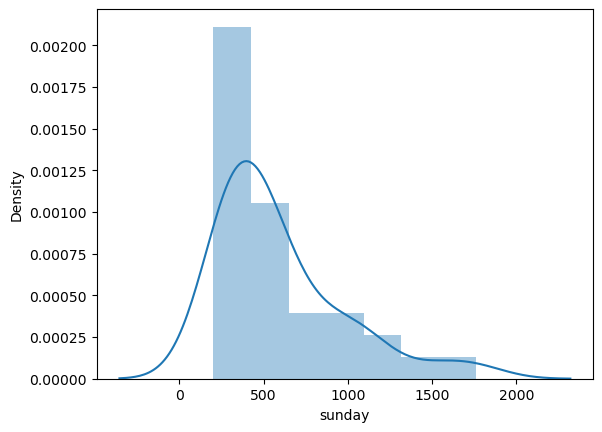

In [10]:
sns.distplot(df['sunday'])

<Axes: xlabel='daily', ylabel='sunday'>

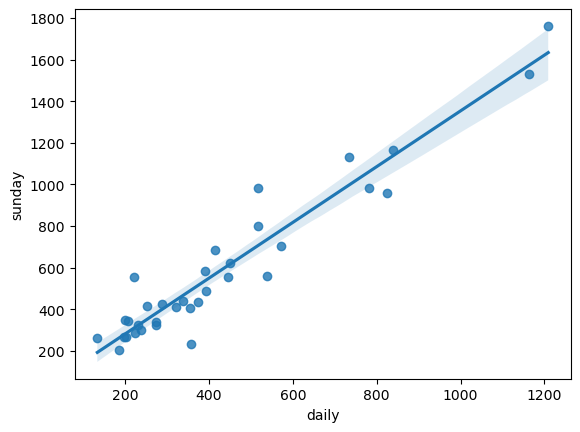

In [11]:
# REG PLOT(REGRESSION PLOT),EDA2
#.reg function
import matplotlib.pyplot as plt
sns.regplot(x=df['daily'],y=df['sunday'],data=df)

In [12]:
# model building and model evaluation
import statsmodels.formula.api as smf
model=smf.ols("sunday~daily",data=df).fit
#OLS=D1SQUARE+D2SQUARE+.....Dnsquare
#~,TIDLE(COMPARISION),DATA

In [13]:
model

<bound method RegressionModel.fit of <statsmodels.regression.linear_model.OLS object at 0x0000012E25CAEE90>>

In [16]:
model().params
# parameters
# beta0 and beta1(y=mx+c),y=beta1x plus beta0(y=beta1x+beto)
# beta1 (m)is 1.33 and bet0=c=y intercept
# Type1error: occurs when Null hypothesis is true ,but you have reject(false Positive)
# Type2error:Opposite statement
# use case:
#Ho:Daily Edition is not dependent  on sunday edition,
# H1:Daily Edition is dependent on sunday edition,

Intercept    13.835630
daily         1.339715
dtype: float64

In [20]:
model().tvalues
# y=mx+c,y=beta1x+beta0
#Intercept of t value=bet0=0.3864,daily(beta1 of t value)=18.93
#

Intercept     0.386427
daily        18.934840
dtype: float64

In [21]:
model().pvalues
#Intercept of p value=bet0=7.017382 xexponetial(to the power of -1),daily(beta1 of p value)=6.016xe-19,
#we acceptalternativa hypothsis

# H1:Daily Edition is dependent on sunday edition


Intercept    7.017382e-01
daily        6.016802e-19
dtype: float64

In [23]:
model().rsquared

0.9180596895873294

In [ ]:
#Infer:Since pvalue ie 6.016802e-19 is less than 0.05,we reject null hypothesis and we accept alternative hypothesis 

In [ ]:
# LR -SUPERVISED MACHINE LEARNING ALGORIHM
# 91 INFER THAT MODEL IS EXCELLENT MODEL
#RSQUARE MODEL=SSR/SST

In [ ]:
#import matplotlib.pyplot as plt
#x=[10,20,30,40,50],X=DAILY
#y=[1,2,3,4,5],Y=SUNDAY
#plt.scatter(x,y)
#plt.xlabel("x axis")
#plt.ylabel("y axis")
#plt.title("SCATTER PLOT")